# 1D Heat Equation

The diffusion equation in 1D is 
$$\frac{\partial\phi}{\partial t}=D\frac{\partial^2\phi}{\partial x^2}$$
for some constant $D$ called the diffusivity.

At discrete values $x_i$ and $t_j$, we write $\Phi_i^j=\phi(x_i,t_j)$. There are multiple ways of discretizing the partial differential equation, but in the Crank-Nicholson method the average of $\partial^2\phi/\partial x^2$ at times $t_j$ and $t_j+\Delta t$ is used.

$$\frac{\Phi_i^{j+1}-\Phi_i^j}{\Delta t}=\frac{D}{2}\bigg(\frac{\Phi_{i+1}^j-2\Phi_i^j+\Phi_{i-1}^j}{\Delta x^2}+\frac{\Phi_{i+1}^{j+1}-2\Phi_i^{j+1}+\Phi_{i-1}^{j+1}}{\Delta x^2}\bigg)$$

Writing $\mu=D\Delta t/2\Delta x^2$, we group together terms evaluated at the same $t_j$ as

$$\Phi_i^{j+1}-\mu(\Phi_{i+1}^{j+1}-2\Phi_i^{j+1}+\Phi_{i-1}^{j+1})=\Phi_i^j+\mu(\Phi_{i+1}^j-2\Phi_i^j+\Phi_{i-1}^j)$$

Given an initial condition $\phi(x,0)=f(x)$ and boundary conditions $\phi(x_0,t)=c_{\text{left}}$, $\phi(x_N,t)=c_{\text{right}}$ for some constant $c_{\text{left}}$, $c_{\text{right}}$, we obtain the solution after one time step by solving

$$-\mu\Phi_{i-1}^{1}+(1+2\mu)\Phi_i^{1}-\mu\Phi_{i+1}^{1}=F(f(x_{i-1}),f(x_i),f(x_{i+1}))$$

for $i\in\{1,2,\dots,N-1\}$ and setting $\Phi_0^0=\Phi_N^0=c$. Note that we require $f(x_0)=c_{\text{left}}$ and $f(x_N)=c_{\text{right}}$.

For example, with $N=3$ we have in matrix form

$$\begin{pmatrix}
1 & 0 & 0 & 0\\
-\mu & 2\mu+1 & -\mu & 0 & 0\\
0 & -\mu & 2\mu+1 & -\mu & 0\\
0 & 0 & 0 & 0 & 1\\
\end{pmatrix}
\begin{pmatrix}
\Phi_0^1\\
\Phi_1^1\\
\Phi_2^1\\
\Phi_3^1\\
\end{pmatrix}
=\begin{pmatrix}
c_{\text{left}}\\
F(c_{\text{left}},f(x_1),f(x_2))\\
F(f(x_1),f(x_2),c_{\text{right}})\\
c_{\text{right}}
\end{pmatrix}~~~.$$

Solutions after further time steps are found from the recursive formula 

$$\begin{pmatrix}
1 & 0 & 0 & 0\\
-\mu & 2\mu+1 & -\mu & 0 & 0\\
0 & -\mu & 2\mu+1 & -\mu & 0\\
0 & 0 & 0 & 0 & 1\\
\end{pmatrix}
\begin{pmatrix}
\Phi_0^{j+1}\\
\Phi_1^{j+1}\\
\Phi_2^{j+1}\\
\Phi_3^{j+1}\\
\end{pmatrix}
=\begin{pmatrix}
c_{\text{left}}\\
F(c_{\text{left}},\Phi_1^j,\Phi_2^j)\\
F(\Phi_1^j,\Phi_2^j,c_{\text{right}})\\
c_{\text{right}}
\end{pmatrix}~~~.$$

Note that the matrix is constant and tridiagonal, so is easily inverted by standard numerical linear algebra routines.

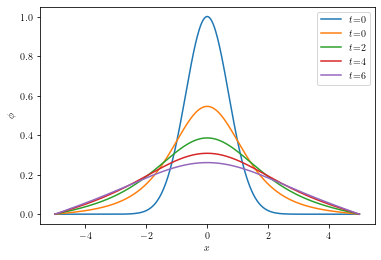

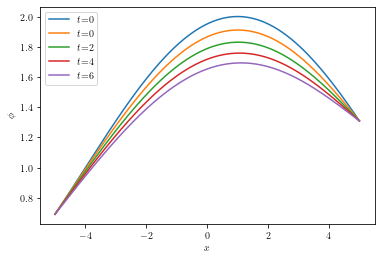

In [154]:
import numpy as np
import matplotlib.pyplot as plt



x_0=-5
x_N=5
N=500
Delta_x=(x_N-x_0)/N

x=np.linspace(x_0,x_N,N+1)
size=len(x)

D=1
Delta_t=2
mu=D*Delta_t/(2*Delta_x**2)

N_it=4 

def Gaussian(x,param):
    return np.exp(-(x-param[0])**2/param[1]**2)

def hump(x,param):
    return param[0]*np.cos(np.pi/2*(x-param[2])/param[3]) + param[1]

def bigF(A,B,C):
    return mu*A + (1-2*mu)*B + mu*C

mean=0
std=1

matrix=np.array([[0.0]*size]*size)

for i in range(0,size):
    for j in range(0,size):
        if i==j:
            if i!=0 and i!=size-1:
                matrix[i,j]=2*mu+1
            else:
                matrix[i,j]=1
        if i!=0 and i!=size-1:
            if i==j+1 or i==j-1:
                matrix[i,j]=-mu

def rhs(phi,func,param):
    rhs=np.array([0.0]*size)

    for i in range(0,size):
        if i==0:
            rhs[i]=func(x[0],param)
        if i==size-1:
            rhs[i]=func(x[-1],param)
        else:
            rhs[i]=bigF(old_phi[i-1],old_phi[i],old_phi[i+1])
            
    return phi

plt.rc('text',usetex=True)
plt.rc('font',family='serif')

# Gaussian initial condition
param=[0,1]
phi=Gaussian(x,param)

plt.figure(1)
plt.plot(x,phi)
tags=['$t$=0']

for iterations in range(0,N_it):
    phi=np.linalg.solve(matrix,rhs(phi,Gaussian,param))
    plt.plot(x,phi)
    tags+=['$t$='+str(iterations*Delta_t)]

plt.xlabel('$x$')
plt.ylabel('$\phi$')
plt.legend(tags)
plt.show()

# sinusoidal hump initial condition
param=[1,1,1,x_N]
phi=hump(x,param)

plt.figure(2)
plt.plot(x,phi)
tags=['$t$=0']

for iterations in range(0,N_it):
    phi=np.linalg.solve(matrix,rhs(phi,hump,param))
    plt.plot(x,phi)
    tags+=['$t$='+str(iterations*Delta_t)]

plt.xlabel('$x$')
plt.ylabel('$\phi$')
plt.legend(tags)
plt.show()